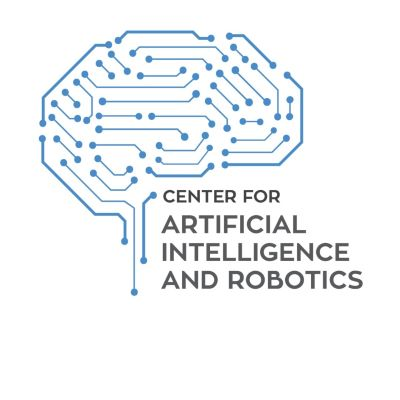

# Decision Trees and Random Forests

# Import Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check out the Data

In [68]:
df = pd.read_csv('kyphosis.csv')

In [70]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [11]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [13]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

## Exploratory Data Analysis (EDA)

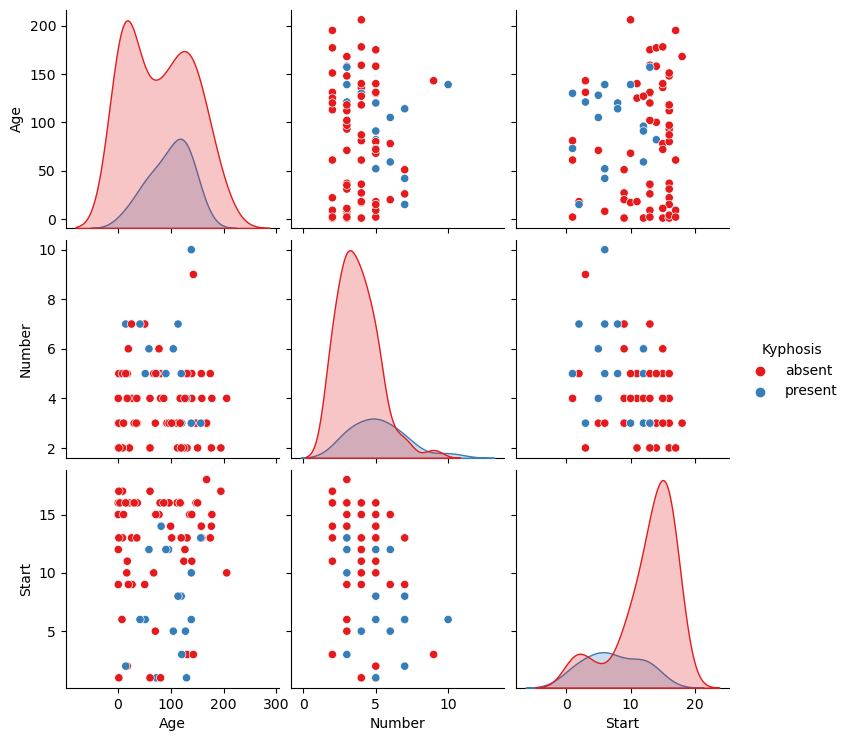

In [16]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Kyphosis'],axis=1), df['Kyphosis'], test_size=0.30, random_state=101)

# Decision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and Evaluations

In [31]:
pred = dtree.predict(X_test)

In [33]:
df_eval=pd.DataFrame({'Label': y_test,'Predicrions':pred})
df_eval

,Label,Predicrions
33,absent,absent
61,present,present
21,present,present
32,absent,absent
20,absent,absent
13,absent,absent
52,present,absent
25,absent,present
22,present,absent
27,absent,absent


In [35]:
print(dtree.score(X_test,y_test))

0.56


In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[12  5]
 [ 6  2]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



# Random Forests

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier()

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
rfc_pred = rfc.predict(X_test)

In [49]:
df_eval=pd.DataFrame({'Label': y_test,'Predicrions':rfc_pred})
df_eval

,Label,Predicrions
33,absent,absent
61,present,present
21,present,present
32,absent,absent
20,absent,absent
13,absent,absent
52,present,absent
25,absent,absent
22,present,absent
27,absent,absent


In [51]:
print(rfc.score(X_test,y_test))

0.76


In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,rfc_pred))

[[17  0]
 [ 6  2]]


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [57]:
pd.DataFrame({'feat':df.drop(['Kyphosis'],axis=1).columns,'value':rfc.feature_importances_*100}).sort_values('value',ascending=False).reset_index().drop('index',axis=1)

,feat,value
0,Age,38.908241
1,Start,34.361798
2,Number,26.729961
